In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme('poster')
sns.set_style('ticks')

In [5]:
def get_df(name: str):
    log_file = f'./logs/{name}.log'
    df = pd.read_csv(log_file, sep=" ", names=["file", "initiator", "event", "receiver", "time"], usecols=["initiator", "event", "receiver", "time"])
    df.replace("775dd6fc-6a04-4acb-acf9-bf754c66136b", "client_1", inplace=True)
    df.replace("a2141b05-1ca1-4fca-9180-a2dd9c195a73", "client_2", inplace=True)
    df.replace("9740da06-b10d-420b-86c3-aeed4fd7938e", "client_3", inplace=True)
    df.replace("e6f9bfef-dd23-4b2e-adc1-14db23f44d4b", "client_4", inplace=True)
    df.replace("29fed6d3-5043-4354-8a12-a82bf0b9eacd", "client_5", inplace=True)
    return df

In [6]:
df_4_1 = get_df("4_clients_1_sender_200")
df_4_1.head()

,initiator,event,receiver,time
0,client_1,client-node-unlocked,client_4,14.5
1,client_1,client-control-locked,client_4,14.5
2,client_1,client-control-unlocked,client_4,14.5
3,client_1,client-control-changed,client_4,14.5
4,client_1,client-node-dragged,client_4,14.5


In [7]:
palette = sns.color_palette("deep", n_colors=len(df_4_1['event'].unique()))
hue_order = df_4_1['event'].unique()

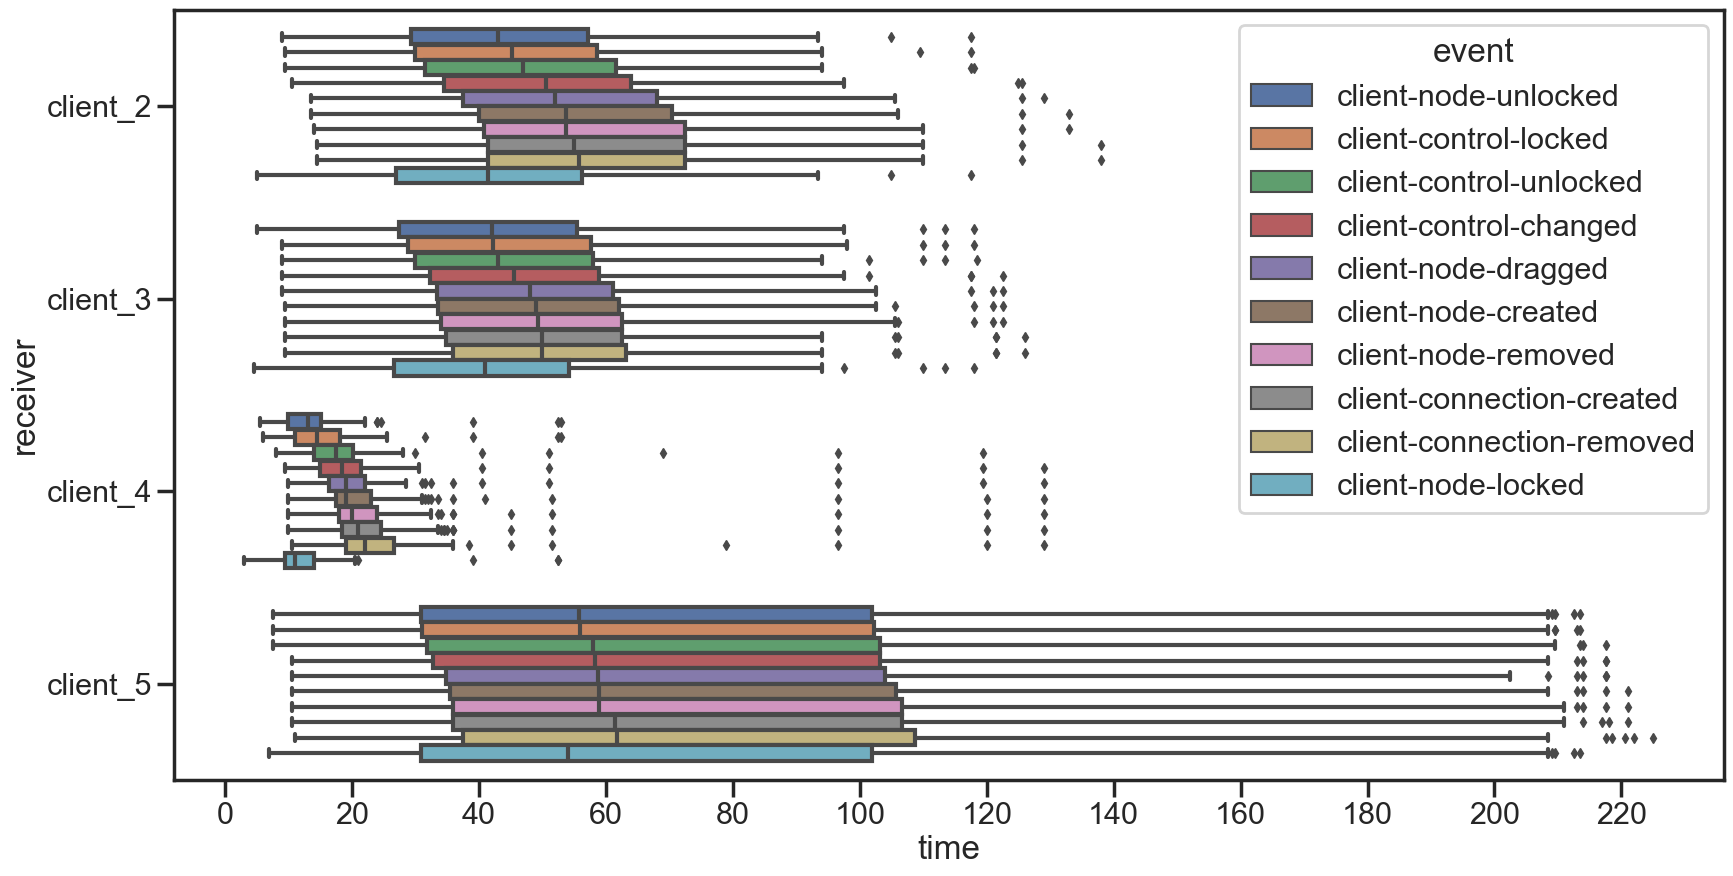

In [8]:
plt.xticks(range(0, 240, 20))
sns.boxplot(data=df_4_1.sort_values(by="receiver"), x="time", y="receiver", hue="event", palette=palette, hue_order=hue_order)
plt.savefig("4_clients_1_sender_200.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [9]:
mac_user_id = "775dd6fc-6a04-4acb-acf9-bf754c66136b"
mac_client_name = "client_1"
df_3_2_mac = get_df("3_client_2_sender_200_mac")
df_3_2_mac.head()

,initiator,event,receiver,time
0,client_2,client-node-locked,client_5,58.5
1,client_2,client-node-unlocked,client_5,58.5
2,client_2,client-control-locked,client_5,58.5
3,client_2,client-control-unlocked,client_5,59.0
4,client_2,client-control-changed,client_5,59.0


In [10]:
mac_events = df_3_2_mac.loc[df_3_2_mac["initiator"] == mac_client_name]
mac_events.head()

,initiator,event,receiver,time
9,client_1,client-node-locked,client_5,19.5
10,client_1,client-node-unlocked,client_5,19.5
11,client_1,client-control-locked,client_5,19.5
12,client_1,client-control-unlocked,client_5,20.0
13,client_1,client-control-changed,client_5,20.0


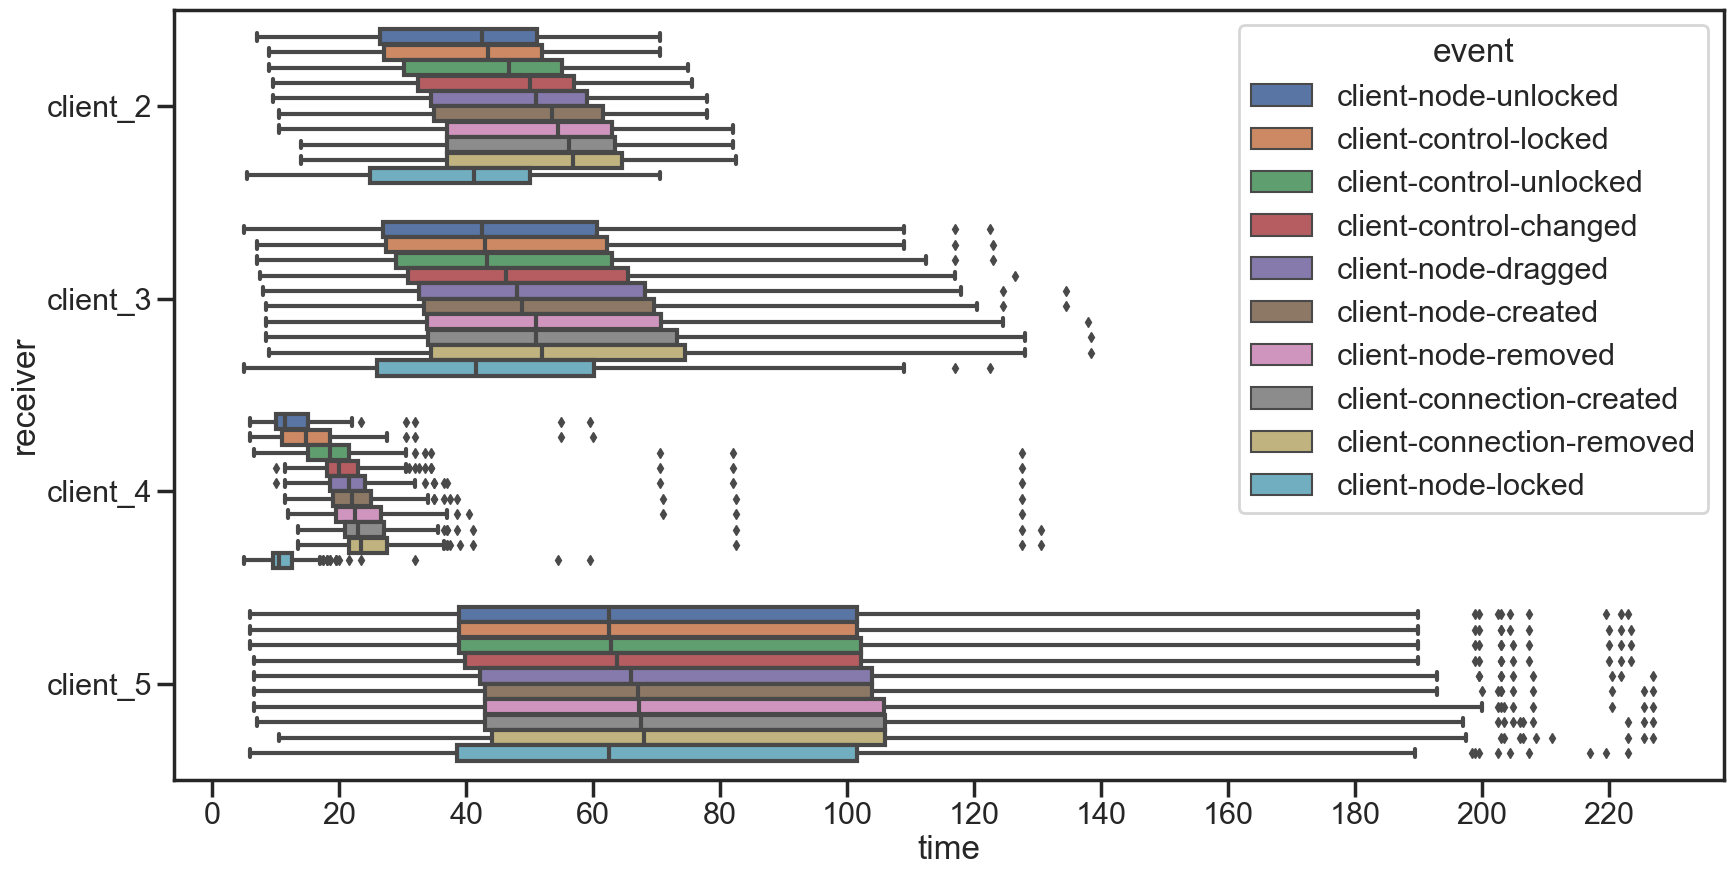

In [11]:
plt.xticks(range(0, 260, 20))
sns.boxplot(data=mac_events.sort_values(by="receiver"), x="time", y="receiver", hue="event", palette=palette, hue_order=hue_order)
plt.savefig("3_client_2_sender_200_mac.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [12]:
lenovo_user_id = "a2141b05-1ca1-4fca-9180-a2dd9c195a73"
lenovo_client_name = "client_2"
df_3_2_lenovo = get_df("3_client_2_sender_200_lenovo")
df_3_2_mac.head()

,initiator,event,receiver,time
0,client_2,client-node-locked,client_5,58.5
1,client_2,client-node-unlocked,client_5,58.5
2,client_2,client-control-locked,client_5,58.5
3,client_2,client-control-unlocked,client_5,59.0
4,client_2,client-control-changed,client_5,59.0


In [13]:
lenovo_events = df_3_2_lenovo.loc[df_3_2_lenovo["initiator"] == lenovo_client_name]
lenovo_events.head()

,initiator,event,receiver,time
0,client_2,client-node-locked,client_1,17.0
1,client_2,client-node-unlocked,client_1,17.5
2,client_2,client-control-locked,client_1,18.0
3,client_2,client-control-unlocked,client_1,19.0
4,client_2,client-control-changed,client_1,19.5


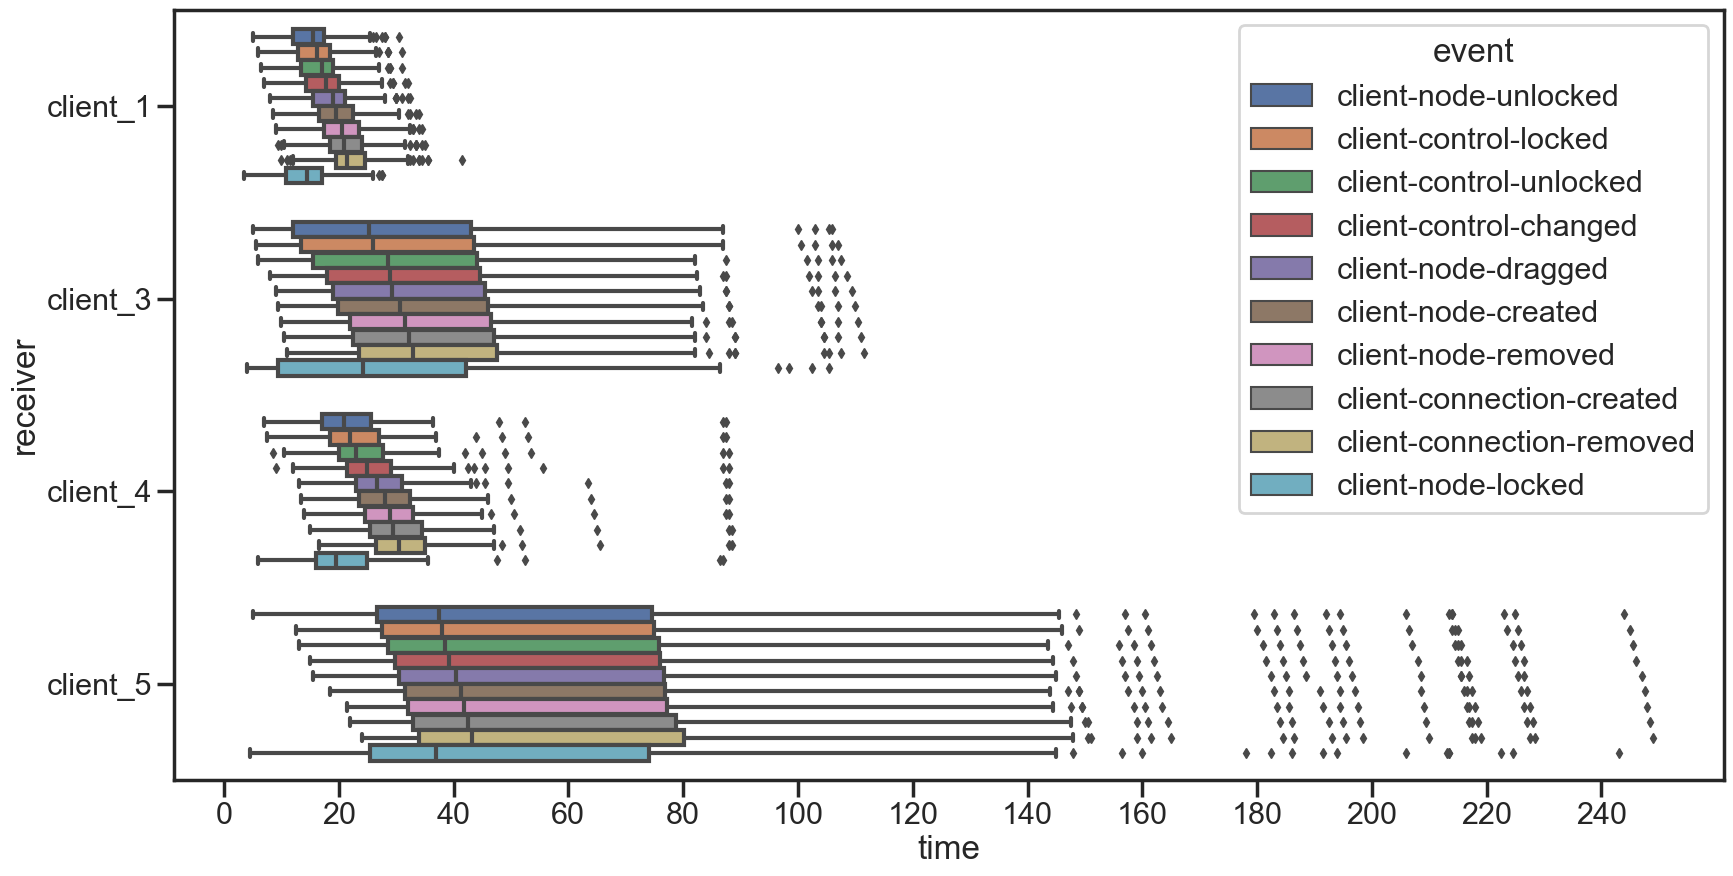

In [14]:
plt.xticks(range(0, 260, 20))
sns.boxplot(data=lenovo_events.sort_values(by="receiver"), x="time", y="receiver", hue="event", palette=palette, hue_order=hue_order)
plt.savefig("3_client_2_sender_200_lenovo.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [15]:

df_3_2_combined = pd.concat([lenovo_events, mac_events])

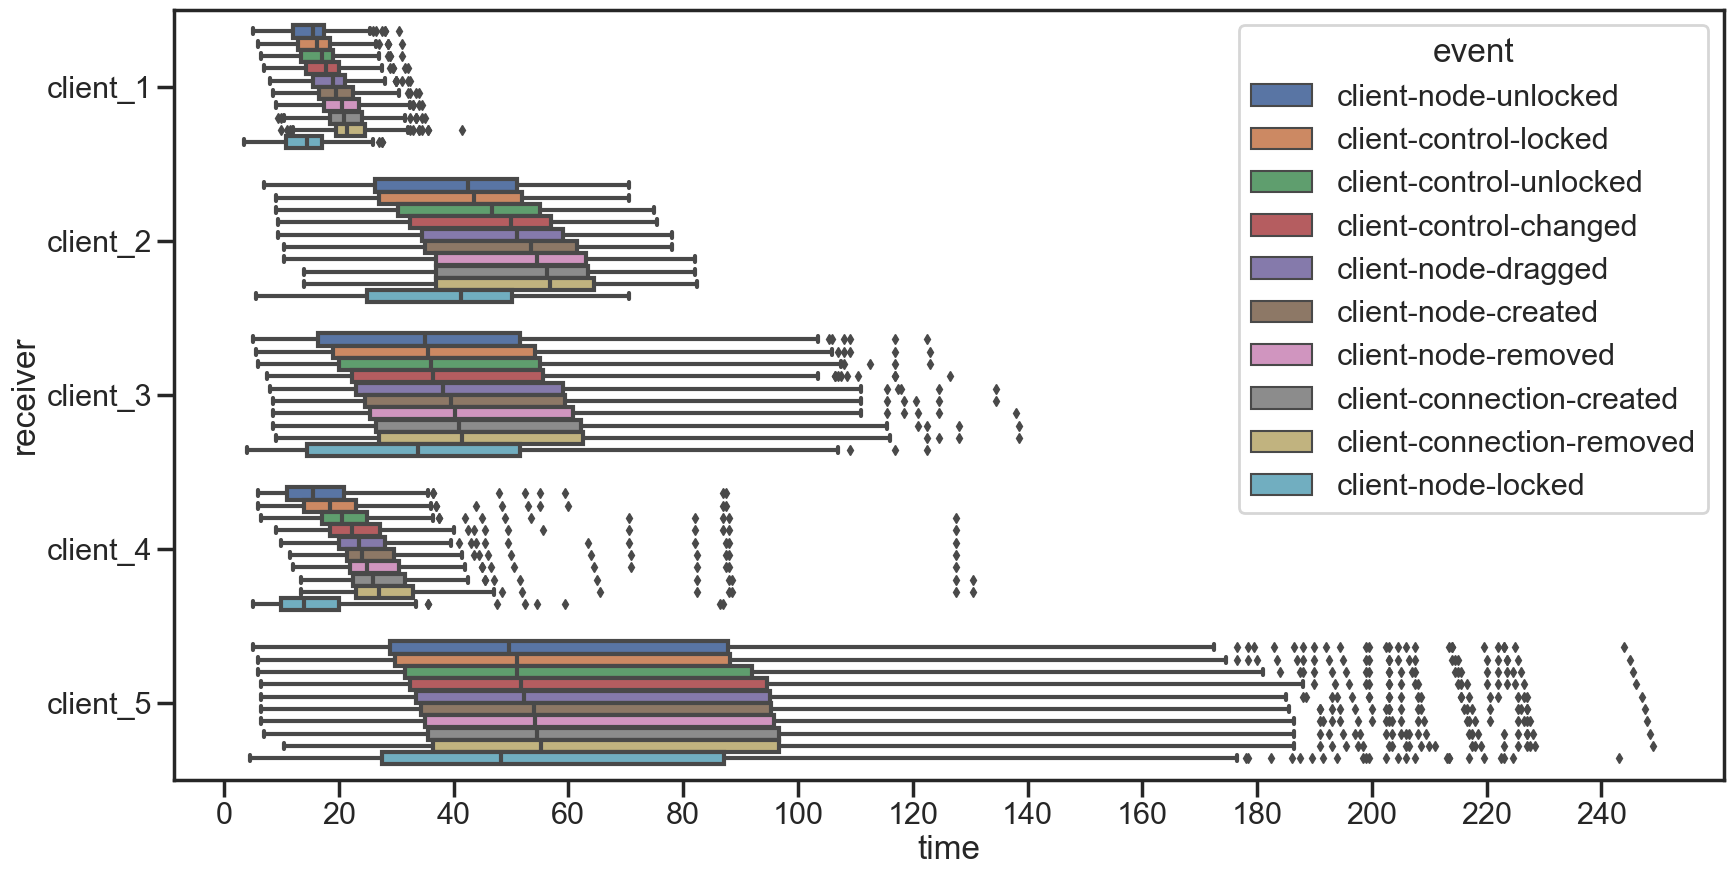

In [16]:
plt.xticks(range(0, 260, 20))
sns.set("poster", rc={'figure.figsize':(20,13)})
sns.set_style('ticks')
ax = sns.boxplot(data=df_3_2_combined.sort_values(by="receiver"), x="time", y="receiver", hue="event", palette=palette, hue_order=hue_order)
plt.savefig("3_client_2_sender_200.pdf", format="pdf", dpi=300, bbox_inches='tight')

[None, None]

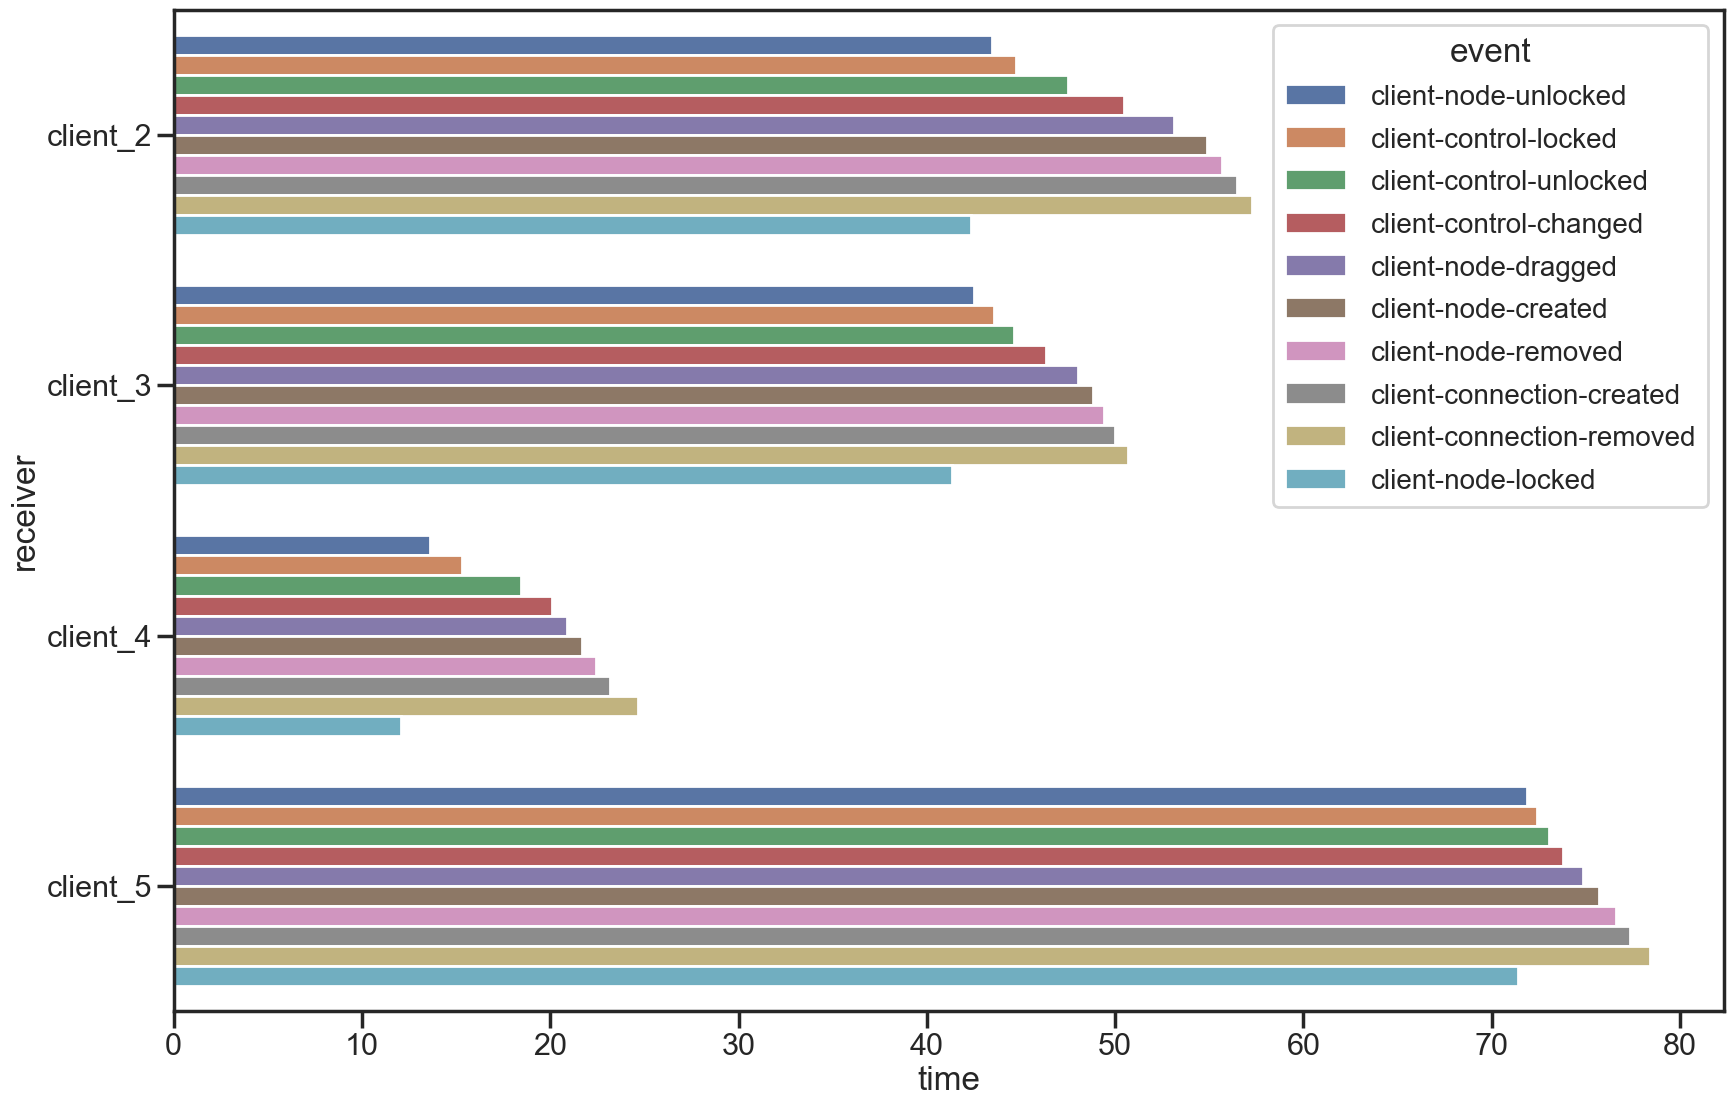

In [17]:
sns.set("poster", rc={'figure.figsize':(20,13)})
sns.set_style('ticks')
gfg = sns.barplot(data=df_4_1.sort_values(by="receiver"), x="time", y="receiver", hue="event", errorbar=None, estimator="mean", palette=palette, hue_order=hue_order)
plt.setp(gfg.get_legend().get_texts(), fontsize='20') 
plt.setp(gfg.get_legend().get_title(), fontsize='24') 

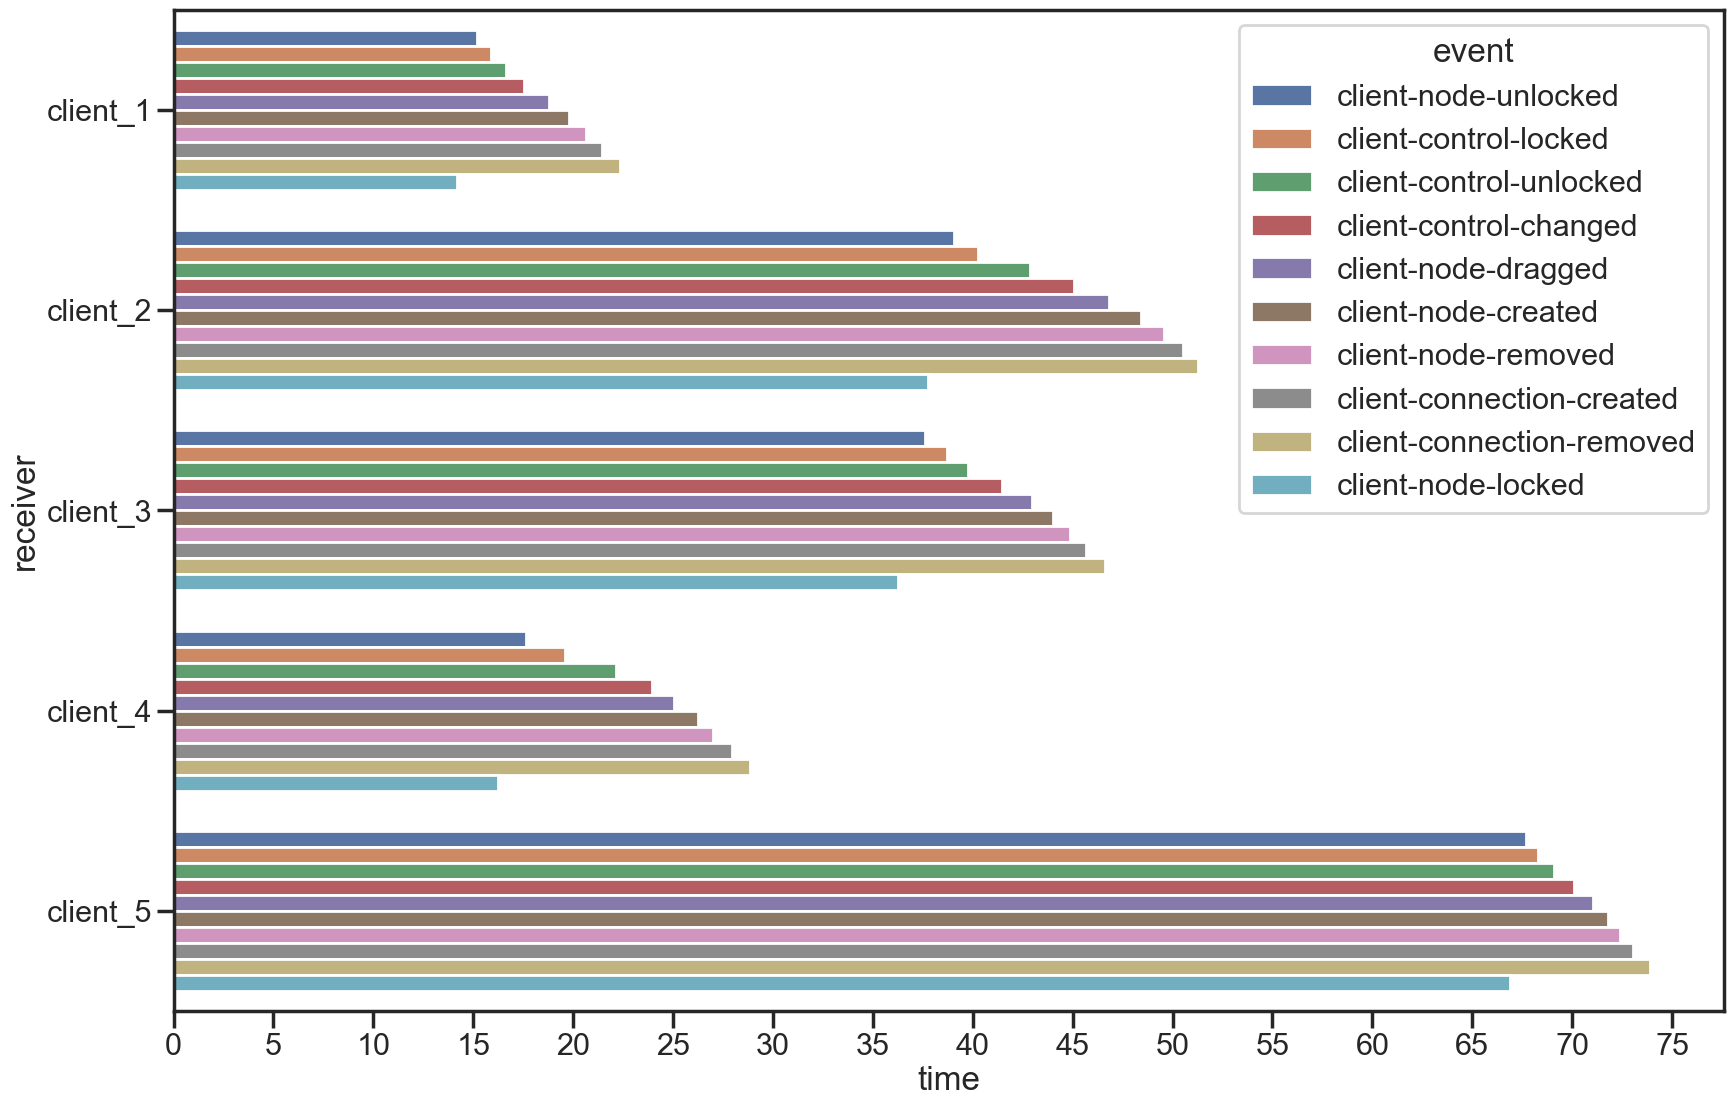

In [18]:
plt.xticks(range(0, 100, 5))
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme('poster')
sns.set_style('ticks')
sns.barplot(data=df_3_2_combined.sort_values(by="receiver"), x="time", y="receiver", hue="event", errorbar=None, estimator="mean", palette=palette, hue_order=hue_order)
plt.savefig("3_client_2_sender_200_mean.pdf", format="pdf", dpi=300, bbox_inches='tight')

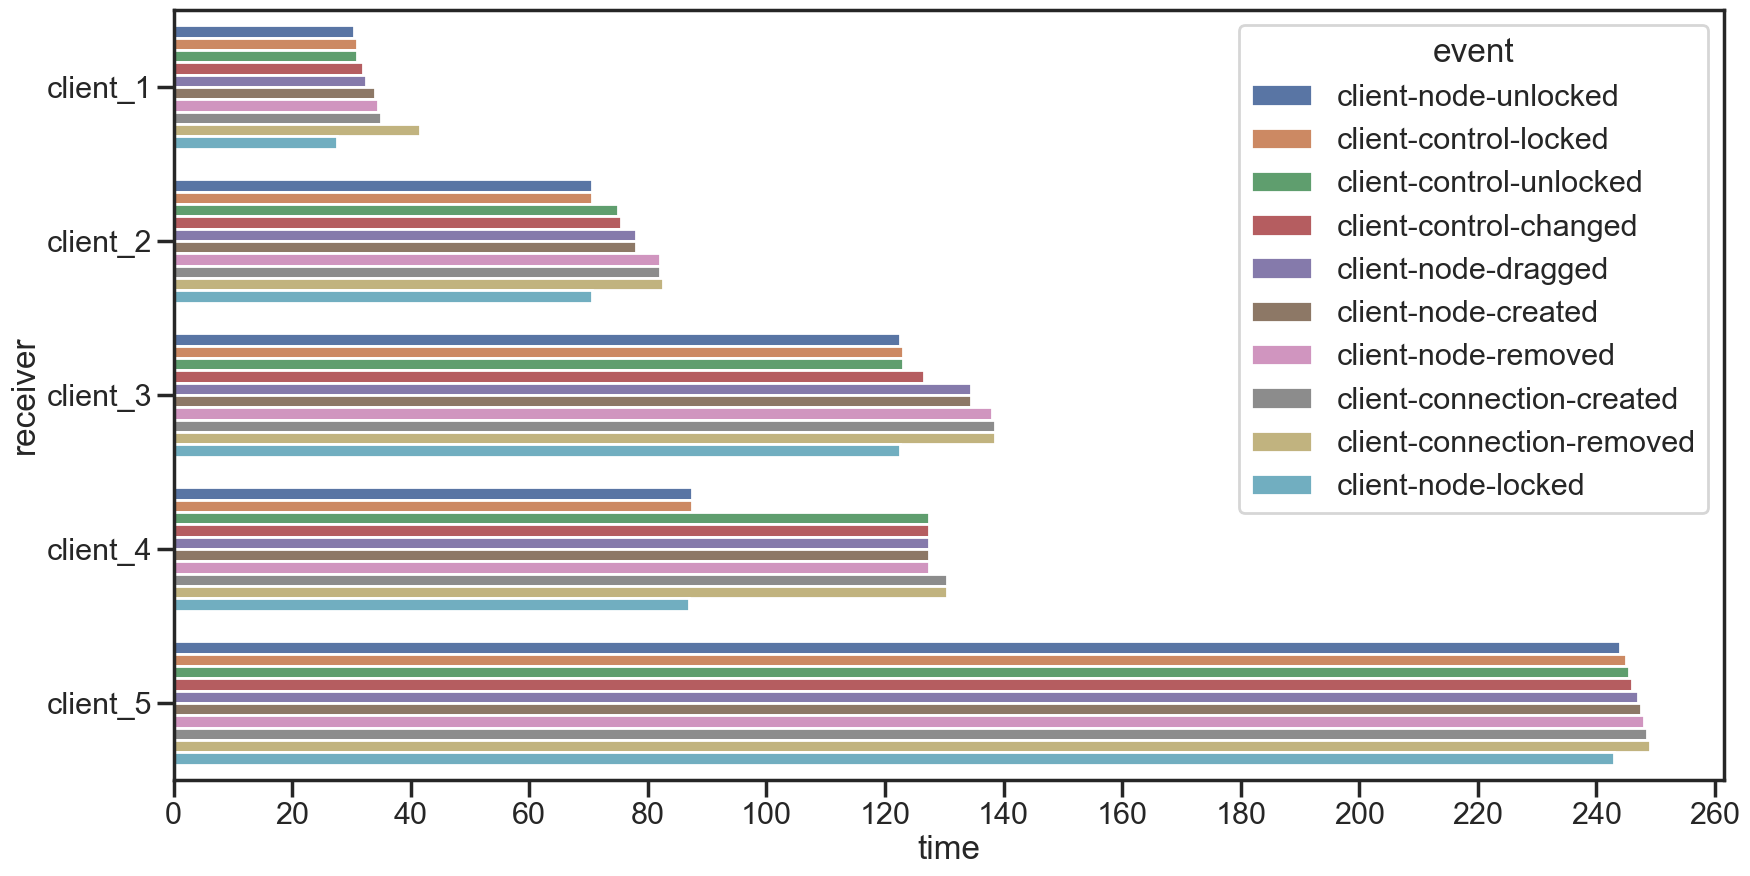

In [19]:
plt.xticks(range(0, 700, 20))
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme('poster')
sns.set_style('ticks')
sns.barplot(data=df_3_2_combined.sort_values(by="receiver"), x="time", y="receiver", hue="event", errorbar=None, estimator="max", palette=palette, hue_order=hue_order)
plt.savefig("3_client_2_sender_200_max.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [20]:
grouped = df_3_2_combined.groupby('receiver')['time']
Q1 = grouped.quantile(0.25)
Q3 = grouped.quantile(0.75)
IQR = Q3 - Q1

# 2. Identify outliers
def is_outlier(row):
    receiver = row['receiver']
    time = row['time']
    return (time < (Q1[receiver] - 1.5 * IQR[receiver])) | (time > (Q3[receiver] + 1.5 * IQR[receiver]))

outliers = df_3_2_combined[df_3_2_combined.apply(is_outlier, axis=1)]

In [21]:
df_cleaned = df_3_2_combined[~df_3_2_combined.apply(is_outlier, axis=1)]

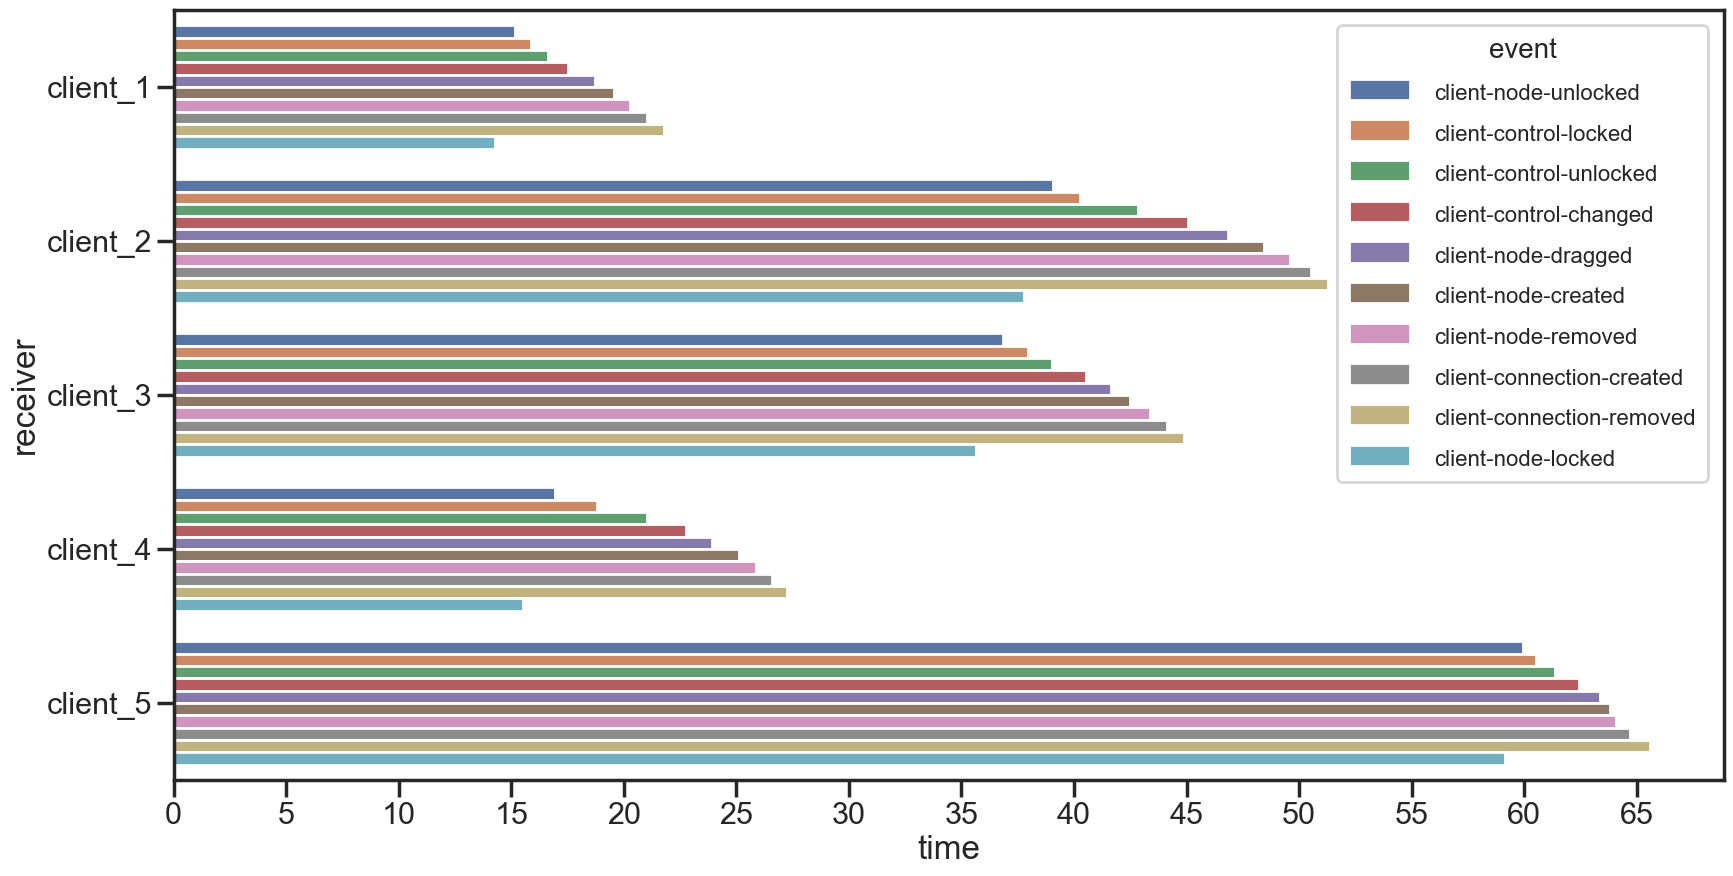

In [22]:
plt.xticks(range(0, 100, 5))
gfg =sns.barplot(data=df_cleaned.sort_values(by="receiver"), x="time", y="receiver", hue="event", errorbar=None, estimator="mean", palette=palette, hue_order=hue_order)
plt.setp(gfg.get_legend().get_texts(), fontsize='16') 
plt.setp(gfg.get_legend().get_title(), fontsize='20') 

plt.savefig("3_client_2_sender_200_mean_no_outlier.pdf", format="pdf", dpi=300, bbox_inches='tight')

In [23]:
lenovo_events["time"].mean()

35.2661875

In [24]:
mac_events["time"].mean()

48.4291875

In [25]:
df_4_1["time"].mean()

47.72871608951119

In [26]:
df_4_1.groupby("receiver").count()

,initiator,event,time
receiver,,,
client_2,2000,2000,2000
client_3,2000,2000,2000
client_4,1999,1999,1999
client_5,2000,2000,2000


In [27]:
df_3_2_combined.groupby("receiver").count()

,initiator,event,time
receiver,,,
client_1,2000,2000,2000
client_2,2000,2000,2000
client_3,4000,4000,4000
client_4,4000,4000,4000
client_5,4000,4000,4000
